PROJETO 2 :

Dado o contexto da seção anterior, suas tarefas neste projeto são:
Utilizar a árvore de decisão de cada modelo para classificar novas flores.

1.   Criar uma função de classificação para cada modelo, a partir de suas respectivas árvores de decisão.

2.   Classificar todas as novas flores, por meio destas funções. 

3.   Definir o melhor modelo.

4.   Definir um modo de medir a performance de cada modelo, a partir das classificações feitas pelos modelos e da real classificação da espécie.

5.   Qual tipo de flor possui mais erros em sua classificação? Considere cada um dos modelos.

6.   Comparar a performance dos modelos.

In [1]:
#importando as bibliotecas
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
 #importação do banco de dados iris
 iris = datasets.load_iris() 
 df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                   columns = iris['feature_names'] + ['target'])
 


In [3]:
# verificar se foi importado o banco de dados correto e quais são as colunas
df.head(150)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [4]:
# podemos notar que no banco de dados importado, temos 5 colunas (0 - 4), que são : Sepal Length ,  Sepal Width, Petal Length, Petal Width e target. E temos 150 amostras, que são as linhas(0-149).  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [5]:
df.describe()# me apresenta os dados de boxplot

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
df['target'].value_counts() # aqui podemos verificar que temos 3 variedades, sendo definidas por 0 = Setosa , 1 - Versicolor e 2 Virginica. Cada uma contendo 50 amostras.

0.0    50
1.0    50
2.0    50
Name: target, dtype: int64

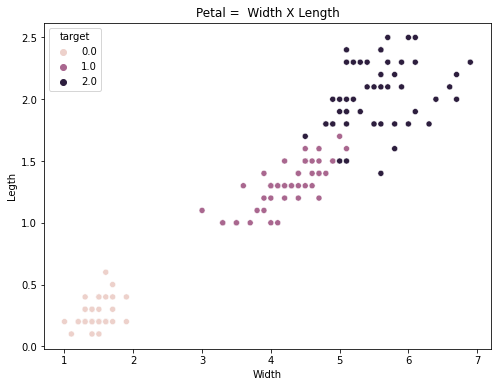

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = df, x= 'petal length (cm)', y = 'petal width (cm)' , hue = 'target')
plt.title('Petal =  Width X Length')
plt.xlabel('Width')
plt.ylabel('Legth')
plt.show()

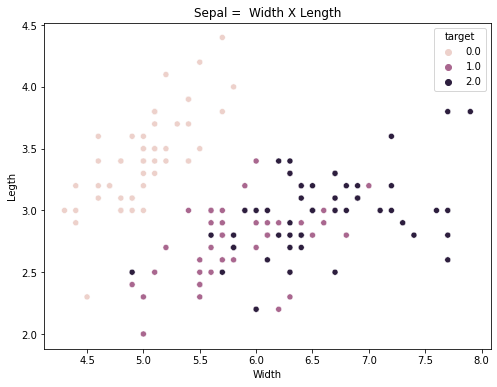

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = df, x= 'sepal length (cm)', y = 'sepal width (cm)' , hue = 'target')
plt.title('Sepal =  Width X Length')
plt.xlabel('Width')
plt.ylabel('Legth')
plt.show()

Analisando os scatterplot de Petal e Sepal, notamos que os tamanhos da Petal tem uma divisão muito visível entres variedades das Iris, apenas analisando esse grafico notamos quais são as variáveis que serão utilizadas para as identificações das Iris.

In [9]:
# Vamos começar a analisar os modelos que temos em mãos. 

#Classificação pelo modelo 1
# vou separar os dados da petal(width e length) em 2 variáveis, e a sepal width

p_leng = df['petal length (cm)']
p_widt = df['petal width (cm)']
s_widt = df['sepal width (cm)']

print(p_widt)
print(p_leng)
print(s_widt)

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal width (cm), Length: 150, dtype: float64
0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal length (cm), Length: 150, dtype: float64
0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64


In [10]:
#vamos criar uma DF para armazenar os dados que vamos coletar do modelo 1 e 2, para serem comparadas com o do banco de dados, assim verificando qual é o mais preciso.


test_m01 = df['target']
test_m02 = df['target']

test_m01.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [ ]:
#iniciar com o if e verificar se está funcionando 

for i in range(149):

  if p_leng[i] <= 2.45 :
    print('Iris Setosa')
    test_m01[i]= 0
  elif p_widt[i] <= 1.75:
    if p_leng[i] <= 4.95:
      if p_widt[i] <= 1.65:
        print('Iris Versicolor')
        test_m01[i]= 1
      else:
        print('Iris Virginica')
        test_m01[i]=(2)
    elif p_widt[i] <= 1.55:
        print('Iris Virginica')
        test_m01[i]= 2
    else:
      print('Iris Versicolor')
      test_m01[i]= 1
  elif p_leng[i] <= 4.85:
    if s_widt[i] <= 3.1:
      print('Iris Virginica')
      test_m01[i]= 2
    else:
      print('Iris Versicolor')
      test_m01[i]= 1
  else:
      print('Iris Virginica')
      test_m01[i]= 2  



In [15]:
#Análise dos acertos e erros para a conferência
df_m01 = pd.DataFrame(test_m01)
df_m01.head(150)

,target
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
145,2.0
146,2.0
147,2.0
148,2.0


In [ ]:
x= 0

while x <= 149:
  if p_leng[x] <= 2.45 :
    print('Iris Setosa')
    test_m02[x]= 0
    x = x+1
  elif p_widt[x] <= 1.75:
    print('Iris Versicolor')
    test_m02[x] = 1
    x = x+1 
  else:
    print('Iris Virginica')
    test_m02[x] = 2
    x = x+1  

In [12]:
#Análise dos acertos e erros para a conferência
df_m02 = pd.DataFrame(test_m02)
df_m02.head(150)

,target
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
145,2.0
146,2.0
147,2.0
148,2.0


In [16]:
result_df = df['target'].value_counts() 
print(f'Resultados da analise do banco de dados Iris : \n{result_df}') 
result_m01 = df_m01['target'].value_counts() 
print(f'Resultado da analise do modelo 1 :\n{result_m01}') 
result_m02 = df_m02['target'].value_counts() 
print(f'Resultados da analise do modelo 2 \n{result_m02}') 

# podemos verificar que o modelo que melhor teve resultado foi o Modelo 1, qual errou apenas 1 flor , acabou identificando um Virginica como Versicolor. Enquanto o Modelo teve 4 erro, sendo a indetificação de 4 Virginica como Versicolor.
# podemos então concluir que o Melhor Modelo de analise é o Modelo, e a especie Virginica é a que os 2 modelos encontram mais dificuldade de predição. 

Resultados da analise do banco de dados Iris : 
1.0    51
0.0    50
2.0    49
Name: target, dtype: int64
Resultado da analise do modelo 1 :
1.0    51
0.0    50
2.0    49
Name: target, dtype: int64
Resultados da analise do modelo 2 
1.0    51
0.0    50
2.0    49
Name: target, dtype: int64


**Eu não tinha entendido muito bem o problema e tinha iniciado utilizando outros tipos de analise, segue embaixo. **

In [17]:
#separamos o DF em 70% treino e 30% teste.

pred = df.iloc[:,:-1]
target = df['target']

x_train, x_test, y_train, y_test = train_test_split(pred, target, test_size=0.3)

In [18]:
#Depois que definimos o treino e test, utilizei a Decicion Tree, que me retornou a acurácia de 88% a 93% nos testes.
#Essa diferença é baseada no bloco de analíse que foi selecionado para treinamento ( ainda não apreendi a como fazer cross para repetir esse treino com blocos aleatórios várias vezes)

dt_model = DecisionTreeClassifier()
dt_fit = dt_model.fit(x_train, y_train)
dt_prediction = dt_fit.predict(x_test)

dt_metric = metrics.accuracy_score(dt_prediction, y_test)
print('Acurácia é de : ', dt_metric)


metrics.confusion_matrix(y_test,dt_prediction, labels=[0,1,2])

Acurácia é de :  0.9333333333333333


array([[15,  0,  0],
       [ 0, 16,  2],
       [ 0,  1, 11]])

In [19]:
# Aqui utilizei o SVM, o qual nos retornou uma acurácia de 93% a 1% nos testes. 

svm_model = svm.SVC(kernel = 'linear', C=1)
svm_fit = svm_model.fit(x_train, y_train)
svm_prediction = svm_fit.predict(x_test)
svm_metric = metrics.accuracy_score(svm_prediction, y_test)
print('Acurácia é de : ', svm_metric)

metrics.confusion_matrix(y_test,svm_prediction, labels=[0,1,2])

Acurácia é de :  0.9333333333333333


array([[15,  0,  0],
       [ 0, 15,  3],
       [ 0,  0, 12]])